In [15]:
import os
import sys 
sys.path.append(os.path.abspath(os.path.join(os.getcwd() , "..")))
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from src import config
warnings.filterwarnings("ignore")

In [44]:
base_dir = os.path.join(os.path.dirname(os.getcwd() ), "..")
csv_path = os.path.abspath(os.path.join("..", config.SET_PATH_DATA))
df = pd.read_csv(csv_path)
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [46]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [48]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## EDA

In [49]:
df_ve = df.copy(deep = True)
df_ve.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [59]:
#df_ve.drop("country" , axis = 1 , inplace = True)
print(df_ve.columns , f"Tổng số lượng cột là {len(df_ve.columns)}")

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object') Tổng số lượng cột là 9


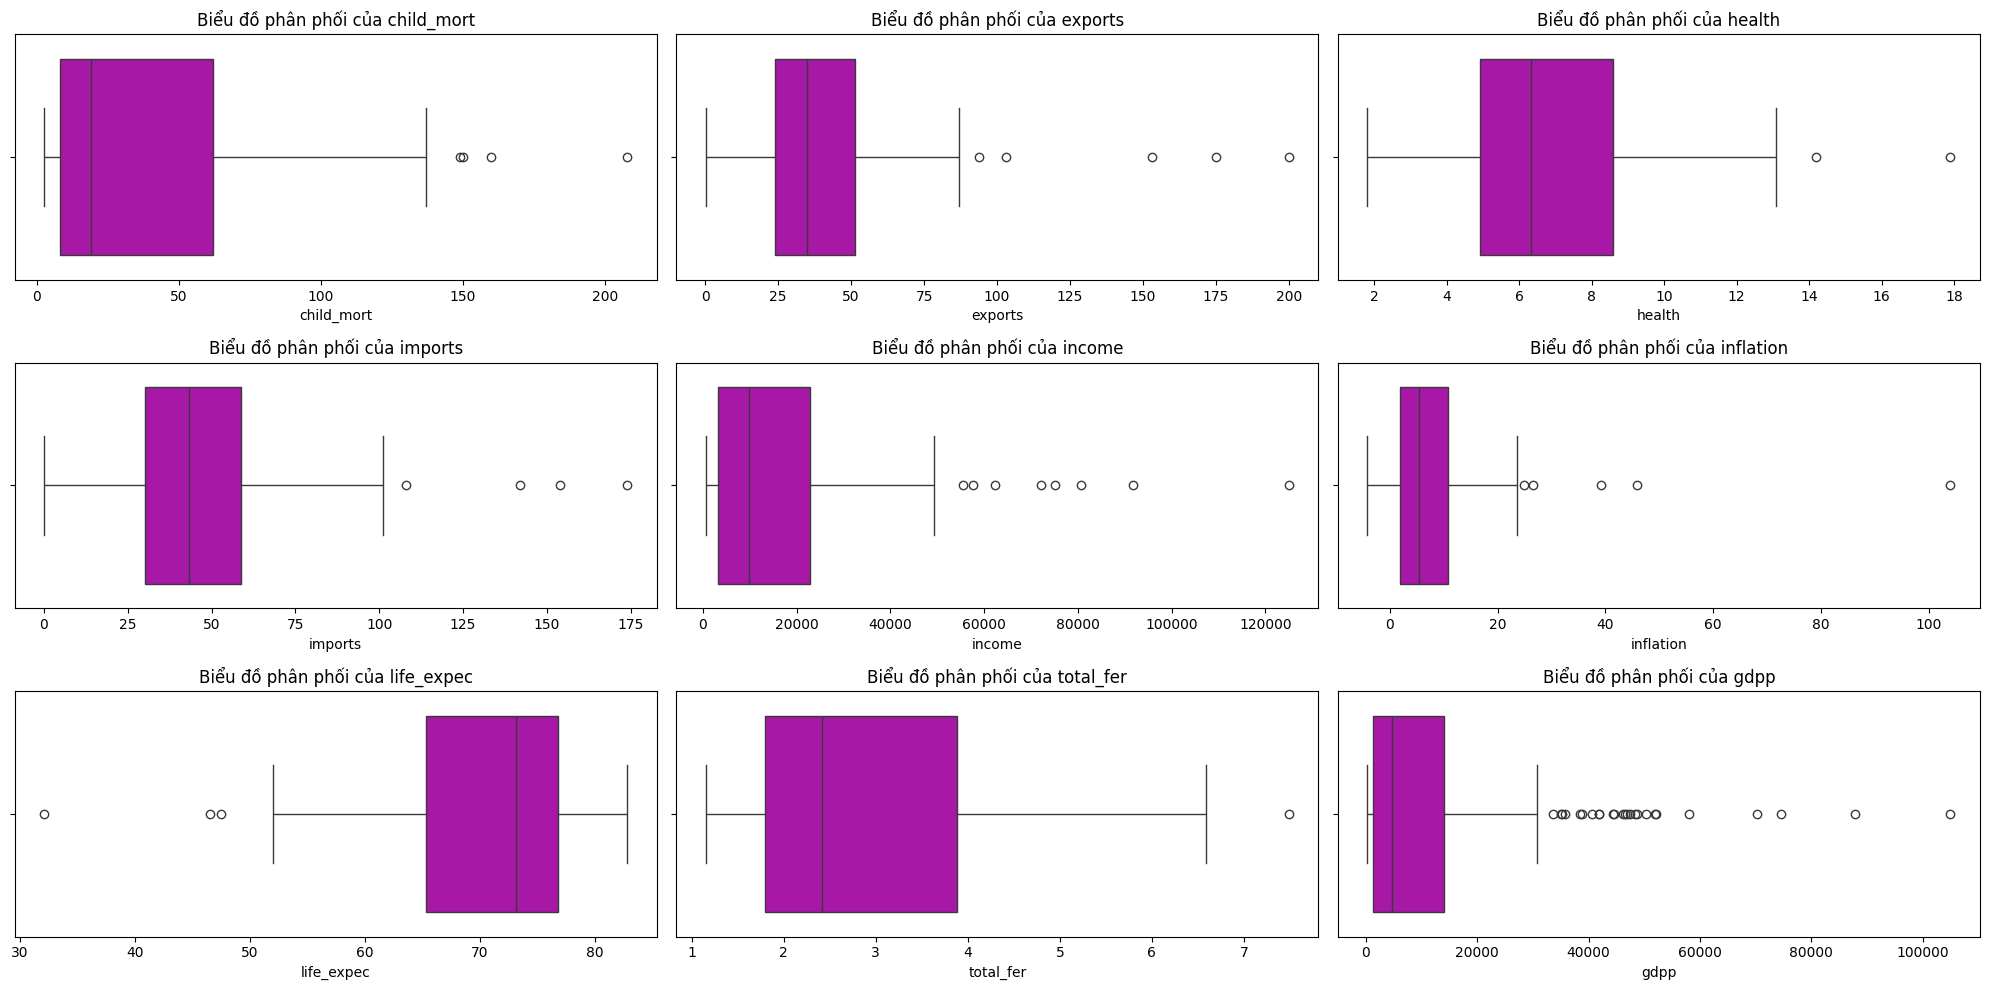

In [80]:
cols = len(df_ve.columns)
cols_ve = 3
rows_ve = cols // 3 
fig , ax = plt.subplots(rows_ve , cols_ve , figsize = (20,10))
for y in range(rows_ve):
    for x in range(cols_ve):
        axes = ax[y , x]
        X = df_ve.iloc[: , y * cols_ve + x]
        sns.boxplot(X , ax = axes , color = 'm' , orient='h')
        title = X.name 
        axes.set_title(f"Biểu đồ phân phối của {title}")
plt.tight_layout()

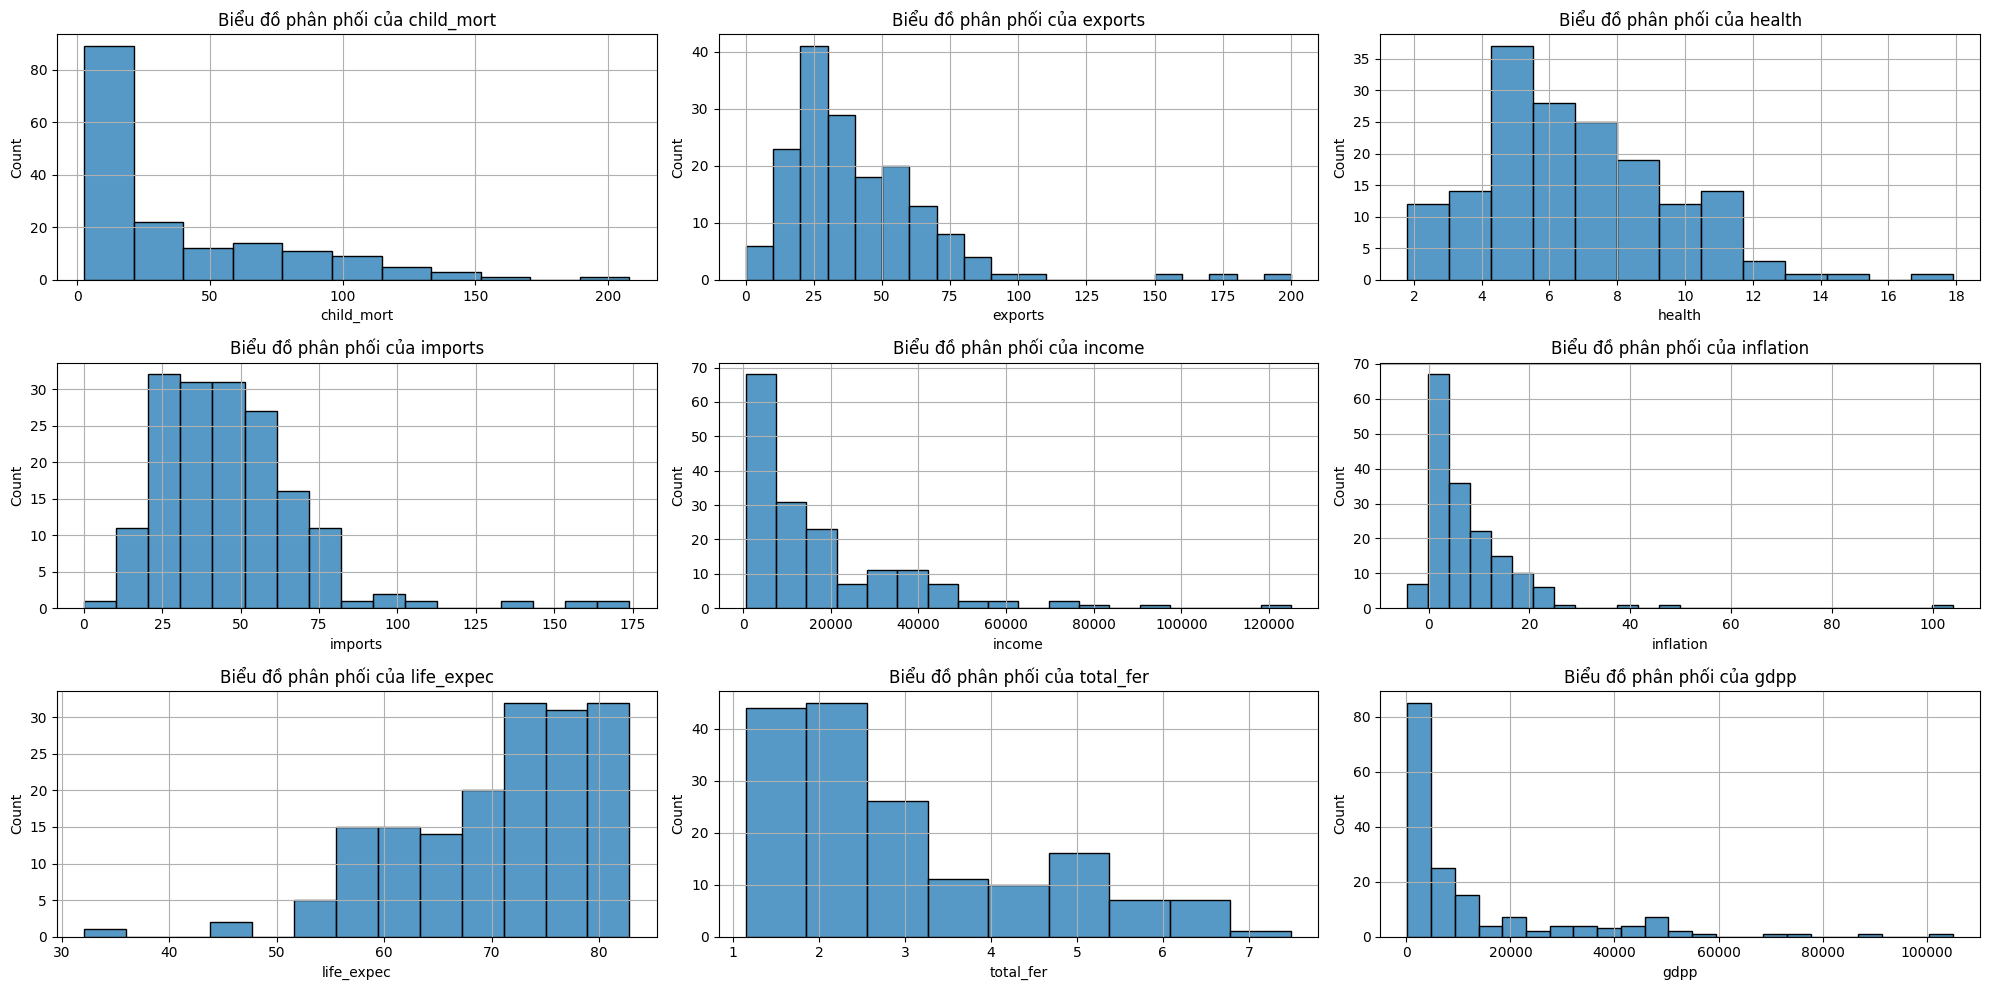

In [85]:
cols = len(df_ve.columns)
cols_ve = 3
rows_ve = cols // 3 
fig , ax = plt.subplots(rows_ve , cols_ve , figsize = (20,10))
for y in range(rows_ve): 
    for x in range(cols_ve):
        axes = ax[y , x]
        X = df_ve.iloc[: , y * cols_ve + x]
        sns.histplot(X , ax = axes)
        axes.grid()
        title = X.name
        axes.set_title(f"Biểu đồ phân phối của {title}")
plt.tight_layout()
        

## Phân bố dữ liệu

- **Health**: Phân phối gần với chuẩn, với đỉnh ở khoảng 4–5.
- **Life expectancy**: Phân phối lệch trái – phần lớn quốc gia có tuổi thọ cao, một số ít thấp.
- Các chỉ số còn lại (**child mortality**, **exports**, **imports**, **income**, **inflation**, **total fertility**, **GDP**) đều **lệch phải**, với đỉnh ở mức thấp và đuôi kéo dài về phía các giá trị cao.

## Tình trạng kinh tế và xã hội

- **Thu nhập bình quân đầu người** rất thấp (đa số dưới 2000 USD).
- **GDP bình quân đầu người** cũng thấp – phản ánh sự giàu có thấp.
- **Của cải và thu nhập** phân bổ không đồng đều, thể hiện rõ qua các giá trị ngoại lệ cao.
- **Mức sống** không đồng đều giữa các quốc gia – thể hiện qua sự chênh lệch lớn trong thu nhập và tuổi thọ trung bình.

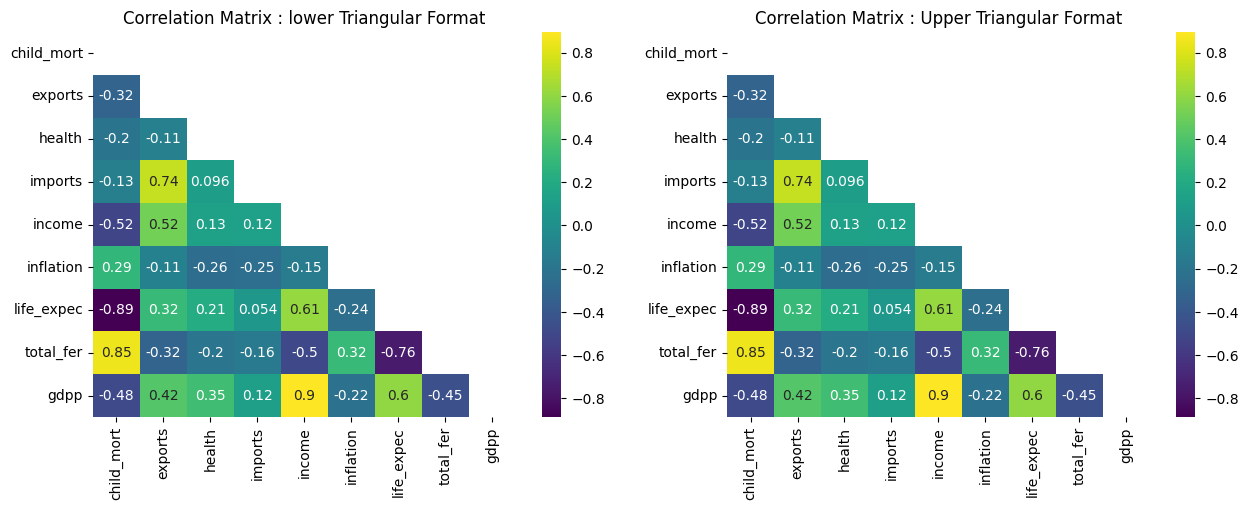

In [93]:
upper_triangle = np.triu(df_ve.corr())
lower_triangle = np.triu(df_ve.corr())

fig , ax = plt.subplots(1,2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(df_ve.corr() , mask = lower_triangle , annot=True , cmap = "viridis" , cbar= True)
plt.title('Correlation Matrix : lower Triangular Format')
plt.subplot(1,2,2 )
sns.heatmap(df_ve.corr() , cmap = 'viridis' , annot= True , mask =upper_triangle , cbar = True)
plt.title('Correlation Matrix : Upper Triangular Format')
plt.show()

## 🧠 Phân tích mối quan hệ giữa các đặc trưng và tình trạng quốc gia

### 📉 Ảnh hưởng của điều kiện kinh tế đến sức khỏe và dân số

- **Tỷ lệ trẻ tử vong cao** thường xảy ra khi:
  - `income`, `life_expec`, `gdpp`, `exports` **giảm**.
  - `inflation` **tăng**.
- Điều này cho thấy **điều kiện kinh tế ảnh hưởng nghiêm trọng** đến sức khỏe và tuổi thọ của người dân.
- `inflation` tăng → **tỷ lệ tử vong và tỷ lệ sinh đều tăng** ⇒ phản ánh các **quốc gia kém phát triển**.

### 🌍 Vai trò của xuất nhập khẩu

- Khi `exports` **tăng**:
  - `gdpp`, `imports`, `life_expec` **tăng**.
  - `child_mort` và `total_fer` **giảm**.
- Cho thấy **xuất nhập khẩu đóng vai trò quan trọng** trong việc thúc đẩy tăng trưởng kinh tế và cải thiện chất lượng cuộc sống.

---

### 🏁 Kết luận: 3 nhóm đặc trưng chính đánh giá tình trạng quốc gia

| Nhóm đặc trưng | Thuộc tính liên quan                                      | Ý nghĩa tổng quan                         |
|----------------|-----------------------------------------------------------|-------------------------------------------|
| **Health**     | `child_mort`, `life_expec`, `health` , `total_fer`                    | Phản ánh sức khỏe và tuổi thọ dân cư     |
| **Trade**      | `exports`, `imports`                                      | Đo lường mức độ mở cửa và hội nhập quốc tế |
| **Finance**    | `income`, `gdpp`, `inflation`                             | Đánh giá năng lực tài chính và ổn định vĩ mô |

=> Dựa trên ba nhóm này, có thể **suy ra mức độ phát triển và tình trạng sống của một quốc gia** một cách tương đối chính xác.


In [92]:
df1 = pd.DataFrame()
df1['Trade'] = (df['imports'] / df['imports'].mean()) + (df['exports'] / df['exports'].mean())
df1['Health'] = (df['child_mort'] / df['child_mort'].mean()) + (df['health'] / df['health'].mean()) + (df['life_expec'] / df['life_expec'].mean()) + (df['total_fer'] / df['total_fer'].mean())
df1['Finance'] = (df['income'] / df['income'].mean()) + (df['inflation'] / df['inflation'].mean()) + (df['gdpp'] / df['gdpp'].mean())
df1.head()

,Trade,Health,Finance
0,1.200812,6.239852,1.349645
1,1.717580,3.035901,1.471658
2,1.603752,3.389763,3.165367
3,2.430387,6.469020,3.494919
4,2.362940,2.964898,2.240150
